In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sea_ice_model import *
from RSData import *
from HaiYangData import *

from scipy.optimize import fmin,fminbound
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

csv_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\HH'
csv_files = glob.glob(csv_dir + '\*.csv')
VV_HH = r'HH'
save_file = r'E:\python_workfile\sea_ice_classification\training6\hist\monthly'

file_lists = HaiYangData.month_split(csv_files)


In [6]:
files = file_lists[0]

In [7]:
name = files[0].split('\\')[-1].split('.')[0][:6]
dataframe = get_data_from_csv(files)

# process_sea_ice_train_dataframe(dataframe)

# dataframe["time"] = pd.to_datetime(dataframe['time'], errors='coerce')

num_bins = 100


hist, bins = np.histogram(dataframe['sig0'], num_bins,range=(-25,-5))

f1 is :
 [-1.52314781e-01 -1.09986682e+01 -2.98025828e+02 -3.77879156e+03
 -2.26320093e+04 -5.07124374e+04]
p1 is :
          5      4       3        2
-0.1523 x - 11 x - 298 x - 3779 x - 2.263e+04 x - 5.071e+04
yvals is :
 [1090.90740191  622.0312966   236.31372772  -72.99553955 -312.34967571
 -487.91063585 -605.5550085  -670.87986454 -689.20860609 -665.59681538
 -604.83810366 -511.46996007 -389.77960054 -243.80981667  -77.36482461
  105.98388604  302.89170333  510.2350441   725.10550509  944.80401403
 1166.83498075 1388.90044835 1608.89424423 1824.89613126 2035.16595887
 2238.13781417 2432.41417306 2616.76005134 2790.09715583 2951.49803546
 3100.18023242 3235.50043323 3356.9486199  3464.14222099 3556.82026277
 3634.8375203  3698.15866855 3746.85243353 3781.08574337 3801.11787946
 3807.29462756 3800.04242889 3779.86253128 3747.32514023 3703.06357009
 3647.7683951  3582.18160055 3507.09073388 3423.32305581 3331.73969141
 3233.22978124 3128.70463248 3019.09186999 2905.32958748 2788.3604

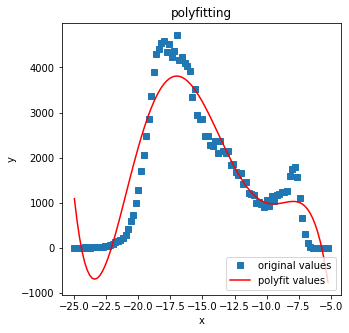

In [8]:

# 用多项式拟合
f1 = np.polyfit(bins[:-1], hist, 5)

print('f1 is :\n', f1)

p1 = np.poly1d(f1)
print('p1 is :\n', p1)
#
# # 也可使用yvals=np.polyval(f1, x)
yvals = p1(bins[:-1])  # 拟合y值

# 绘图
plt.figure(figsize=(5,5))
plot1 = plt.plot(bins[:-1], hist, 's', label='original values')
plot2 = plt.plot(bins[:-1], yvals, 'r', label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4)  # 指定legend的位置右下角
plt.title('polyfitting')
plt.show()

In [9]:
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret


# y是真实的分布hist
def fitting(M=0):
    """
    n 为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(bins[:-1], hist))
    print('Fitting Parameters:', p_lsq[0])

    return p_lsq

In [56]:
p_lsq_12 = fitting(M=12)

Fitting Parameters: [7.33469311e-08 1.26781322e-05 1.00007952e-03 4.77254350e-02
 1.53697695e+00 3.51917998e+01 5.86438147e+02 7.14278968e+03
 6.28355129e+04 3.87450042e+05 1.58156681e+06 3.81861202e+06
 4.10571755e+06]


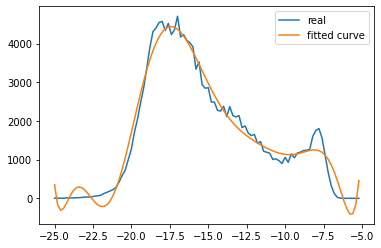

In [58]:

# 可视化
plt.plot(bins[:-1], hist, label='real')
plt.plot(bins[:-1], fit_func(p_lsq_12[0], bins[:-1]), label='fitted curve')
# plt.plot(x, y, 'bo', label='noise')
plt.legend()

p_lsq_0_func = fit_func(p_lsq_12[0], bins[:-1])

In [28]:
# 导出最小二乘法所得
func = np.poly1d(p_lsq_12[0])

In [39]:
# 求出导数为0的点
x_list = np.polyder(func,1).r

In [53]:
# 规定阈值只能在-12dB到-16dB之间
x_list = x_list[(x_list < -12)& (x_list > -16)]

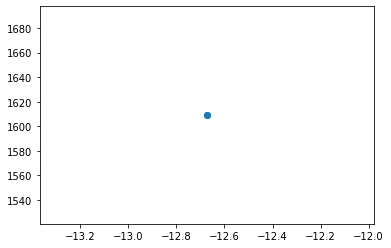

In [54]:
plt.scatter(x_list, func(x_list))

In [37]:
from scipy import signal

[-292.74081798 -196.55002637 1105.97103745 -376.19665783]
(array([ 2, 16, 76, 96], dtype=int64),)


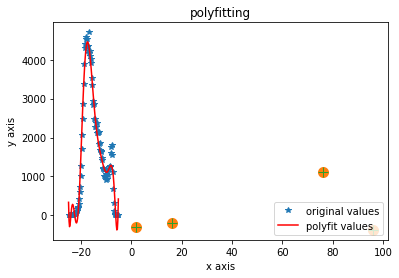

In [38]:
print(fit_func(p_lsq_12[0], bins[:-1])[signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]), np.less)]) #极大值的y轴, fit_func(p_lsq_12[0], bins[:-1])为要求极值的序列
print(signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]), np.less))  #极大值的x轴
peak_ind = signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]),np.less)[0] #极大值点，改为np.less即可得到极小值点
plt.plot(bins[:-1], hist, '*',label='original values')
plt.plot(bins[:-1], fit_func(p_lsq_12[0], bins[:-1]), 'r',label='polyfit values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=4)
plt.title('polyfitting')
plt.plot(signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]),np.less)[0],fit_func(p_lsq_12[0], bins[:-1])[signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]), np.less)],'o', markersize=10)  #极大值点
plt.plot(signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]),np.less)[0],fit_func(p_lsq_12[0], bins[:-1])[signal.argrelextrema(fit_func(p_lsq_12[0], bins[:-1]), np.less)],'+', markersize=10)  #极小值点
plt.show()